In [16]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import datetime

In [17]:
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/' #ernesto's copy cleaned
flist = glob.glob(path + '/*.npy')

In [ ]:
dt        = []
zmean_lst = np.array([])
zmin_lst  = np.array([])
zmax_lst  = np.array([])
zmed_lst  = np.array([])
zstd_lst  = np.array([])

for f in sorted(flist):
    
    # parse date in filename
    dt_str = f.split("/")[-1] #splits on / and saves the last one
    dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
    dt.append(dt_str) #appends date str to list
    
    # load and compute stats
    d=np.load(f) #loads cleaned numpy arrays 
    zmean = np.nanmean(d)
    zmin  = np.nanmin(d)
    zmax  = np.nanmax(d)
    zmed  = np.nanmedian(d)
    zstd  = np.nanstd(d)

    # append to empty list
    zmean_lst = np.append(zmean_lst,zmean)
    zmin_lst  = np.append(zmin_lst,zmin)
    zmax_lst  = np.append(zmax_lst,zmax) 
    zmed_lst  = np.append(zmed_lst,zmed)
    zstd_lst  = np.append(zstd_lst,zstd)
    
dt = pd.to_datetime(dt) #convert to datetime
# print(dt)

# create pandas DateFrame
df = pd.DataFrame(zip(zmean_lst,zmin_lst,zmax_lst,zmed_lst,zstd_lst), columns = ['mean (m)','min (m)','max (m)','med (m)','std (m)'],index = dt)
# df

years = sorted(set([dt.year for dt in df.index]))

fig = plt.figure(figsize=(20,8))
for year in years:
    # year by year snow depth
    startTime = pd.to_datetime("10-01-{}".format(year-1))
    endTime = pd.to_datetime("09-30-{}".format(year))
    
    # annual subset of DataFrame
    data = df[(df.index >= startTime) & (df.index <= endTime)] #option, .loc
    
    plt.plot(data.index, data['mean (m)'],'r.-', markersize=8)
    plt.plot(data.index, data['min (m)'],'g.-', markersize=8)
    plt.plot(data.index, data['max (m)'],'b.-', markersize=8)
    plt.plot(data.index, data['med (m)'],'k.-', markersize=8)
    plt.plot(data.index, data['std (m)'],'c.-', markersize=8)
    
plt.title('Tuolumne Basin Snow Depth Stats')
plt.xlabel('Year'); plt.ylabel('stats [m]')
plt.grid(True)
plt.show()

(16780, 17489)


/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


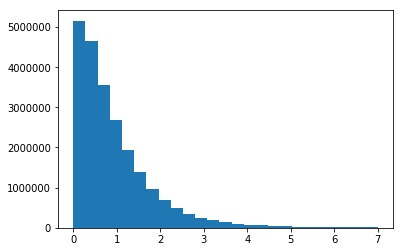

In [14]:
# for f in sorted(flist): 
#     print(f)

f = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/arr_20130525.npy'
d_=np.load(f)
d=np.squeeze(d_)

print(d.shape)
plt.hist(d[d !=0], bins=25)
plt.show()

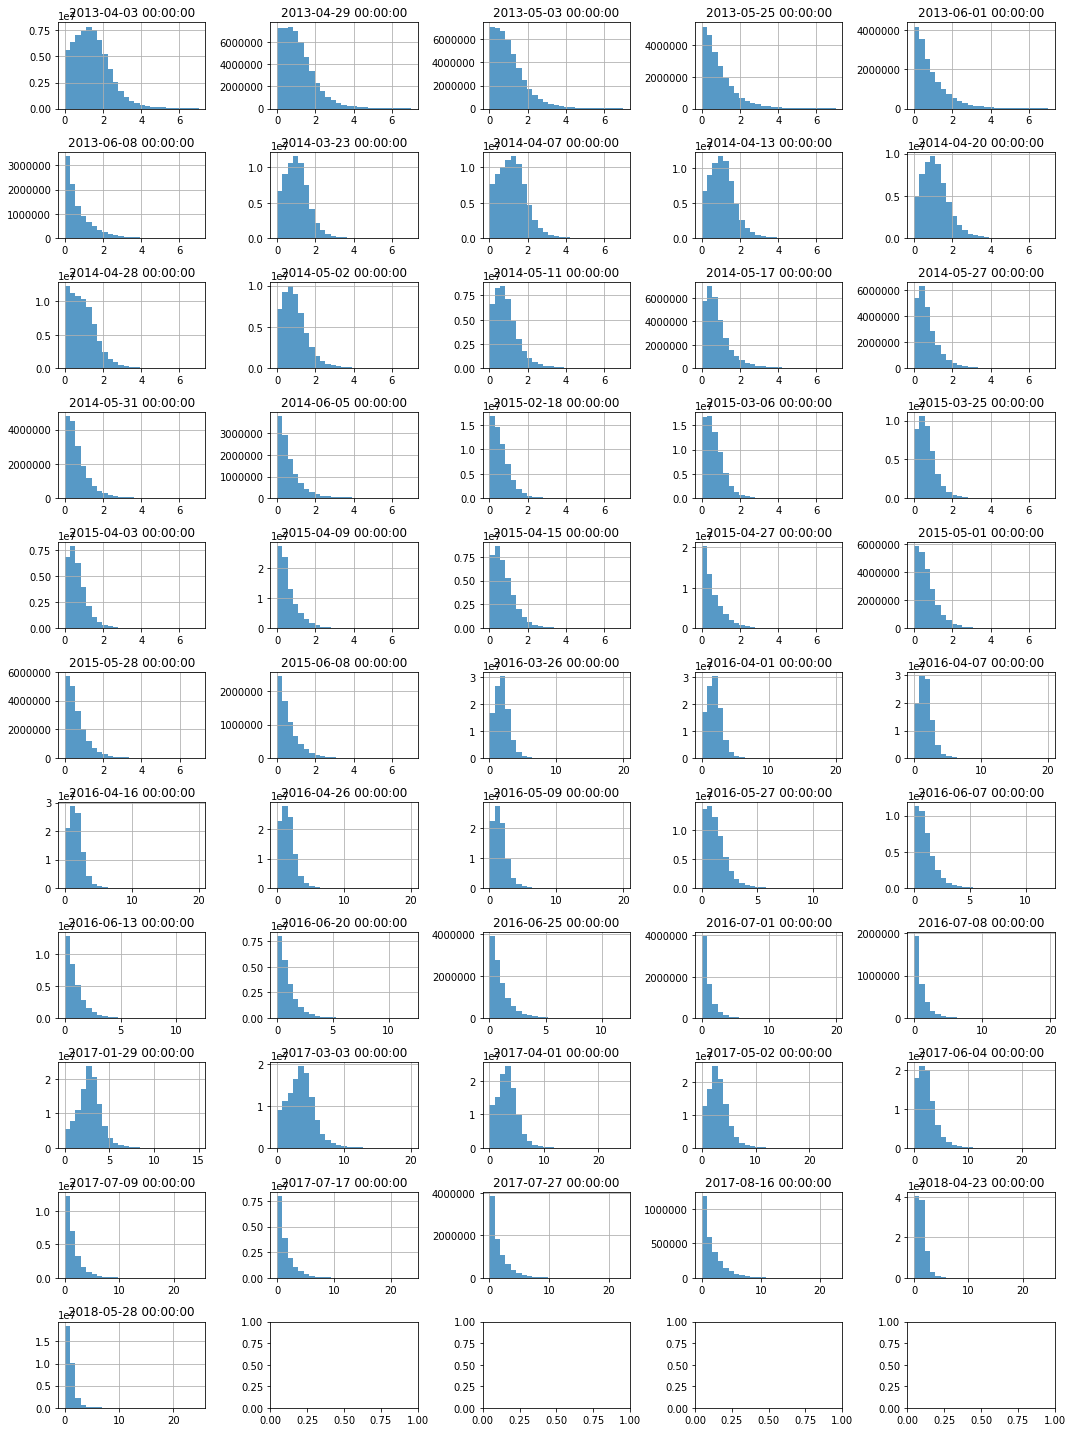

In [23]:
# z=0

fig,axs=plt.subplots(11,5, figsize=(15,20)) 

ax = axs.flat #counting plots


for i,f in enumerate(sorted(flist)):
#     print(f)

    #loop over data
    d_=np.load(f)
    d=np.squeeze(d_)
    
    #title info (i.e date)
    dt_str = f.split("/")[-1] #splits on / and saves the last one
    dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
    dt = pd.to_datetime(dt_str) #convert to datetime
    
    #plot data
#     ax[i].plt.hist(d[d !=0], bins=25)
    ax[i].hist(d[d !=0], bins=25, alpha=0.75) #don't consider the 0's in the histogram
    ax[i].grid(True)

    ax[i].set_title(dt.date())
    
#     z+=1
    
# cb = fig.colorbar(im, ax=list(axs))
# cb.set_label('Snow Depth [m]')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
from rasterio.plot import show_hist
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime


In [ ]:
#list of files
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/'

flist = glob.glob(path + '/*.tif')
for i,f in enumerate(sorted(flist)):
    print(i,f)    

In [ ]:
#NOTE -- clipped files have 2 Bands: (1) snow depth 2) mask of tuolumne shapefile

stats=[]

for f in sorted(flist):
    im = rasterio.open(f, 'r')
    a = im.read(1) #band1 has snow depth data
    print('size', a.shape)
    stats.append({
        'file':    f.split('/')[-1],
        'min':     a.min(),
        'max':     a.max(),
        'mean':    a.mean(),
        'median':  np.median(a)
    })
    
# stats

#Result -- 
    #2016 - has NANs and stripping through lidar
    #2018 - area outside (and more?) of tuolumne has -9999

In [ ]:
# ## THIS WORKS....but above does same!!

# # Raster Stats (#add pixel size??)
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/'
# stats =[]

# for i,f in enumerate(sorted(glob.glob(os.path.join(path, '*.tif')))):
#     print(f)
#     im = rasterio.open(f, 'r')
#     a = im.read(1)
# #     print(a)
#     stats.append({
#         'date':    i,
#         'min':     a.min(),
#         'max':     a.max(),
#         'mean':    a.mean(),
#         'median':  np.median(a)
#     })
    
# stats

In [ ]:
#TEMPLATE ON SUBPLOTS

start = 2013
end = 2018
yrs = range(start, end+1)
z=0

fig,axs=plt.subplots(2,3, figsize=(15,10)) 

ax = axs.flat #counting plots


for i,f in enumerate(sorted(flist)):
#     print(f)

    ''' open Tuolumne shapefile '''
    
    with fiona.open(shp, "r") as shapefile:
        geoms = [feature["geometry"] for feature in shapefile]
        
    ''' open lidar tifs
        crops to shapefile
        makes no data NANs '''

    with rasterio.open(f) as src:
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan)
#         out_meta = src.meta.copy()



    ''' plot settings'''
        
    im = ax[i].imshow(out_image[0,:,:], cmap='Blues', vmax=15) #15 meters max on colorbar

    ax[i].set_title('{}'.format(yrs[z]))
    
    z+=1
    
cb = fig.colorbar(im, ax=list(axs))
cb.set_label('Snow Depth [m]')
# plt.tight_layout()
plt.show()

In [ ]:
# Clean Data (Raster to numpy)

plt.figure(figsize = (15, 10))
# i_plot = 1
for f in sorted(flist):
    im = rasterio.open(f, 'r')
    a = im.read(1)
#     a = a.astype('float') #dont need this, values are already floats.....
    idx = a>0.001
    a[~idx] = np.nan
#     ax = plt.subplot(2,3,i_plot)
    plt.imshow(a, cmap ='rainbow')
    plt.colorbar()
    
    
#     show_hist(a,bins=25)
#     plt.show()
    
#     i_plot +=1
    
    plt.show()

In [ ]:
# # Clean Data (Raster to numpy)
# fig, axs = plt.subplots(3,2, figsize=(5, 5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.01)

# axs = axs.ravel()

# for f in sorted(flist):
#     im = rasterio.open(f, 'r')
#     a = im.read(1)
# #     a = a.astype('float') #dont need this, values are already floats.....
#     idx = a>0.001
#     a[~idx] = np.nan
    
    
    
#     plt.imshow(a, cmap ='rainbow')
#     plt.colorbar()
#     plt.show()

In [ ]:
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak'
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20150415_clipped.tif'


fig = plt.figure(figsize=(20,8))
im = rasterio.open(path, 'r')
f = im.read(1)
show_hist(f,bins=30)
plt.show()




# # raster = io.imread(f) #path

# # f = rasterio.open(path, 'r')
# # arr = f.read(1)
# # print(type(arr))
# # idx=arr>0.001
# # print(arr.shape,arr[idx].shape)
# # # arr = arr[idx]
# # # print(arr.shape)
# # plt.imshow(arr[idx], cmap='pink')
# # plt.colorbar()
# # plt.show()

# fig = plt.figure(figsize=(20,8))
# im = rasterio.open(path, 'r')
# # print(im.meta)
# f = im.read(1)
# # m1=np.min(f)
# # m2=np.max(f)
# # print(m1,m2)
# # print('f',f.shape)
# ff=f>0.001
# # mi=np.min(ff)
# # mx=np.max(ff)
# # print(mi,mx)
# plt.imshow(ff)
# # # plt.colorbar()
# plt.show()
# # print('ff',ff.shape)
# # # idx = f>0.001
# # # f = img.read(1)
# # # print(type(f))
# # # print(f)
# # # print(f.shape)
# # # idx = f>0.001
# # # f_= f[idx]
# # # print(np.min(f))
# # # print(np.max(f))
# # # plt.imshow(f[idx].read(1), cmap='pink')
# # # plt.colorbar()
# # # plt.show()

# show_hist(ff,bins=30)
# plt.show()
# # # # print('done')
